In [199]:
import pandas as pd
from pandas_datareader import data

In [200]:
#get ticker
ticker_symbs = ['XLU', 'XLB', 'XLI', 'XLV', 'XLF', 'XLE', 
                'MDY', 'XLK', 'XLY', 'XLP', 'QQQ', 'SPY']
data_source = 'google'

#get data from all available dates on google finance
start_date = '2010-01-02' #appears to be earliest date available
end_date = '2017-12-31' #appears to be latest date available

#returns the data as a panel object (stability warning, finance APIs are in flux)
panel_data = data.DataReader(ticker_symbs, data_source, start_date, end_date) 

/anaconda3/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


In [201]:
#returns a Pandas DataFrame indexed by date
price = panel_data.loc['Close']

#get all 'B'usiness days 
business_days = pd.date_range(start=start_date, end=end_date, freq='B')
price = price.reindex(business_days)

In [202]:
price.head(15)

MDY    QQQ     SPY    XLB    XLE    XLF    XLI    XLK    XLP  \
2010-01-04  133.95  46.42  113.33  34.02  58.81  14.69  28.32  23.27  26.67   
2010-01-05  134.29  46.42  113.63  34.13  59.29  14.96  28.42  23.24  26.68   
2010-01-06  135.02  46.14  113.71  34.71  60.00  14.99  28.48  22.98  26.66   
2010-01-07  135.66  46.17  114.19  34.44  59.91  15.31  28.79  22.89  26.66   
2010-01-08  136.51  46.55  114.57  34.92  60.30  15.22  29.25  23.04  26.57   
2010-01-11  136.24  46.36  114.73  34.73  60.22  15.23  29.57  22.95  26.64   
2010-01-12  134.69  45.78  113.66  34.07  59.35  15.01  29.33  22.70  26.79   
2010-01-13  136.41  46.35  114.62  34.47  59.57  15.18  29.45  22.92  26.98   
2010-01-14  136.67  46.39  114.93  34.05  59.74  15.25  29.45  22.98  26.90   
2010-01-15  134.84  45.85  113.64  33.80  59.26  14.94  29.07  22.66  26.77   
2010-01-18     NaN    NaN     NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2010-01-19  136.56  46.59  115.06  34.34  59.80  15.13  29.39  23.05  26.93   
2010-01-20  135.49  45.92  113.89  33.73  58.87  15.09  28.94  22.68  26.73   
2010-01-21  133.73  45.49  111.70  32.27  57.67  14.66  28.27  22.44  26.35   
2010-01-22  130.92  44.16  109.21  31.63  56.30  14.18  27.84  21.66  26.29   

              XLU    XLV    XLY  
2010-01-04  31.08  31.61  30.00  
2010-01-05  30.71  31.30  30.11  
2010-01-06  30.89  31.62  30.15  
2010-01-07  30.75  31.73  30.40  
2010-01-08  30.72  31.78  30.39  
2010-01-11  31.04  31.96  30.33  
2010-01-12  30.91  31.73  29.94  
2010-01-13  31.25  32.15  30.28  
2010-01-14  31.11  32.44  30.28  
2010-01-15  30.91  32.22  29.98  
2010-01-18    NaN    NaN    NaN  
2010-01-19  31.27  33.00  30.38  
2010-01-20  30.94  32.72  29.97  
2010-01-21  30.49  32.01  29.59  
2010-01-22  29.82  31.66  29.02

In [203]:
#fill holiday-NaNs with last available price
price = price.fillna(method='ffill')  #think push-"forward" fill
price.head(15)

MDY    QQQ     SPY    XLB    XLE    XLF    XLI    XLK    XLP  \
2010-01-04  133.95  46.42  113.33  34.02  58.81  14.69  28.32  23.27  26.67   
2010-01-05  134.29  46.42  113.63  34.13  59.29  14.96  28.42  23.24  26.68   
2010-01-06  135.02  46.14  113.71  34.71  60.00  14.99  28.48  22.98  26.66   
2010-01-07  135.66  46.17  114.19  34.44  59.91  15.31  28.79  22.89  26.66   
2010-01-08  136.51  46.55  114.57  34.92  60.30  15.22  29.25  23.04  26.57   
2010-01-11  136.24  46.36  114.73  34.73  60.22  15.23  29.57  22.95  26.64   
2010-01-12  134.69  45.78  113.66  34.07  59.35  15.01  29.33  22.70  26.79   
2010-01-13  136.41  46.35  114.62  34.47  59.57  15.18  29.45  22.92  26.98   
2010-01-14  136.67  46.39  114.93  34.05  59.74  15.25  29.45  22.98  26.90   
2010-01-15  134.84  45.85  113.64  33.80  59.26  14.94  29.07  22.66  26.77   
2010-01-18  134.84  45.85  113.64  33.80  59.26  14.94  29.07  22.66  26.77   
2010-01-19  136.56  46.59  115.06  34.34  59.80  15.13  29.39  23.05  26.93   
2010-01-20  135.49  45.92  113.89  33.73  58.87  15.09  28.94  22.68  26.73   
2010-01-21  133.73  45.49  111.70  32.27  57.67  14.66  28.27  22.44  26.35   
2010-01-22  130.92  44.16  109.21  31.63  56.30  14.18  27.84  21.66  26.29   

              XLU    XLV    XLY  
2010-01-04  31.08  31.61  30.00  
2010-01-05  30.71  31.30  30.11  
2010-01-06  30.89  31.62  30.15  
2010-01-07  30.75  31.73  30.40  
2010-01-08  30.72  31.78  30.39  
2010-01-11  31.04  31.96  30.33  
2010-01-12  30.91  31.73  29.94  
2010-01-13  31.25  32.15  30.28  
2010-01-14  31.11  32.44  30.28  
2010-01-15  30.91  32.22  29.98  
2010-01-18  30.91  32.22  29.98  
2010-01-19  31.27  33.00  30.38  
2010-01-20  30.94  32.72  29.97  
2010-01-21  30.49  32.01  29.59  
2010-01-22  29.82  31.66  29.02

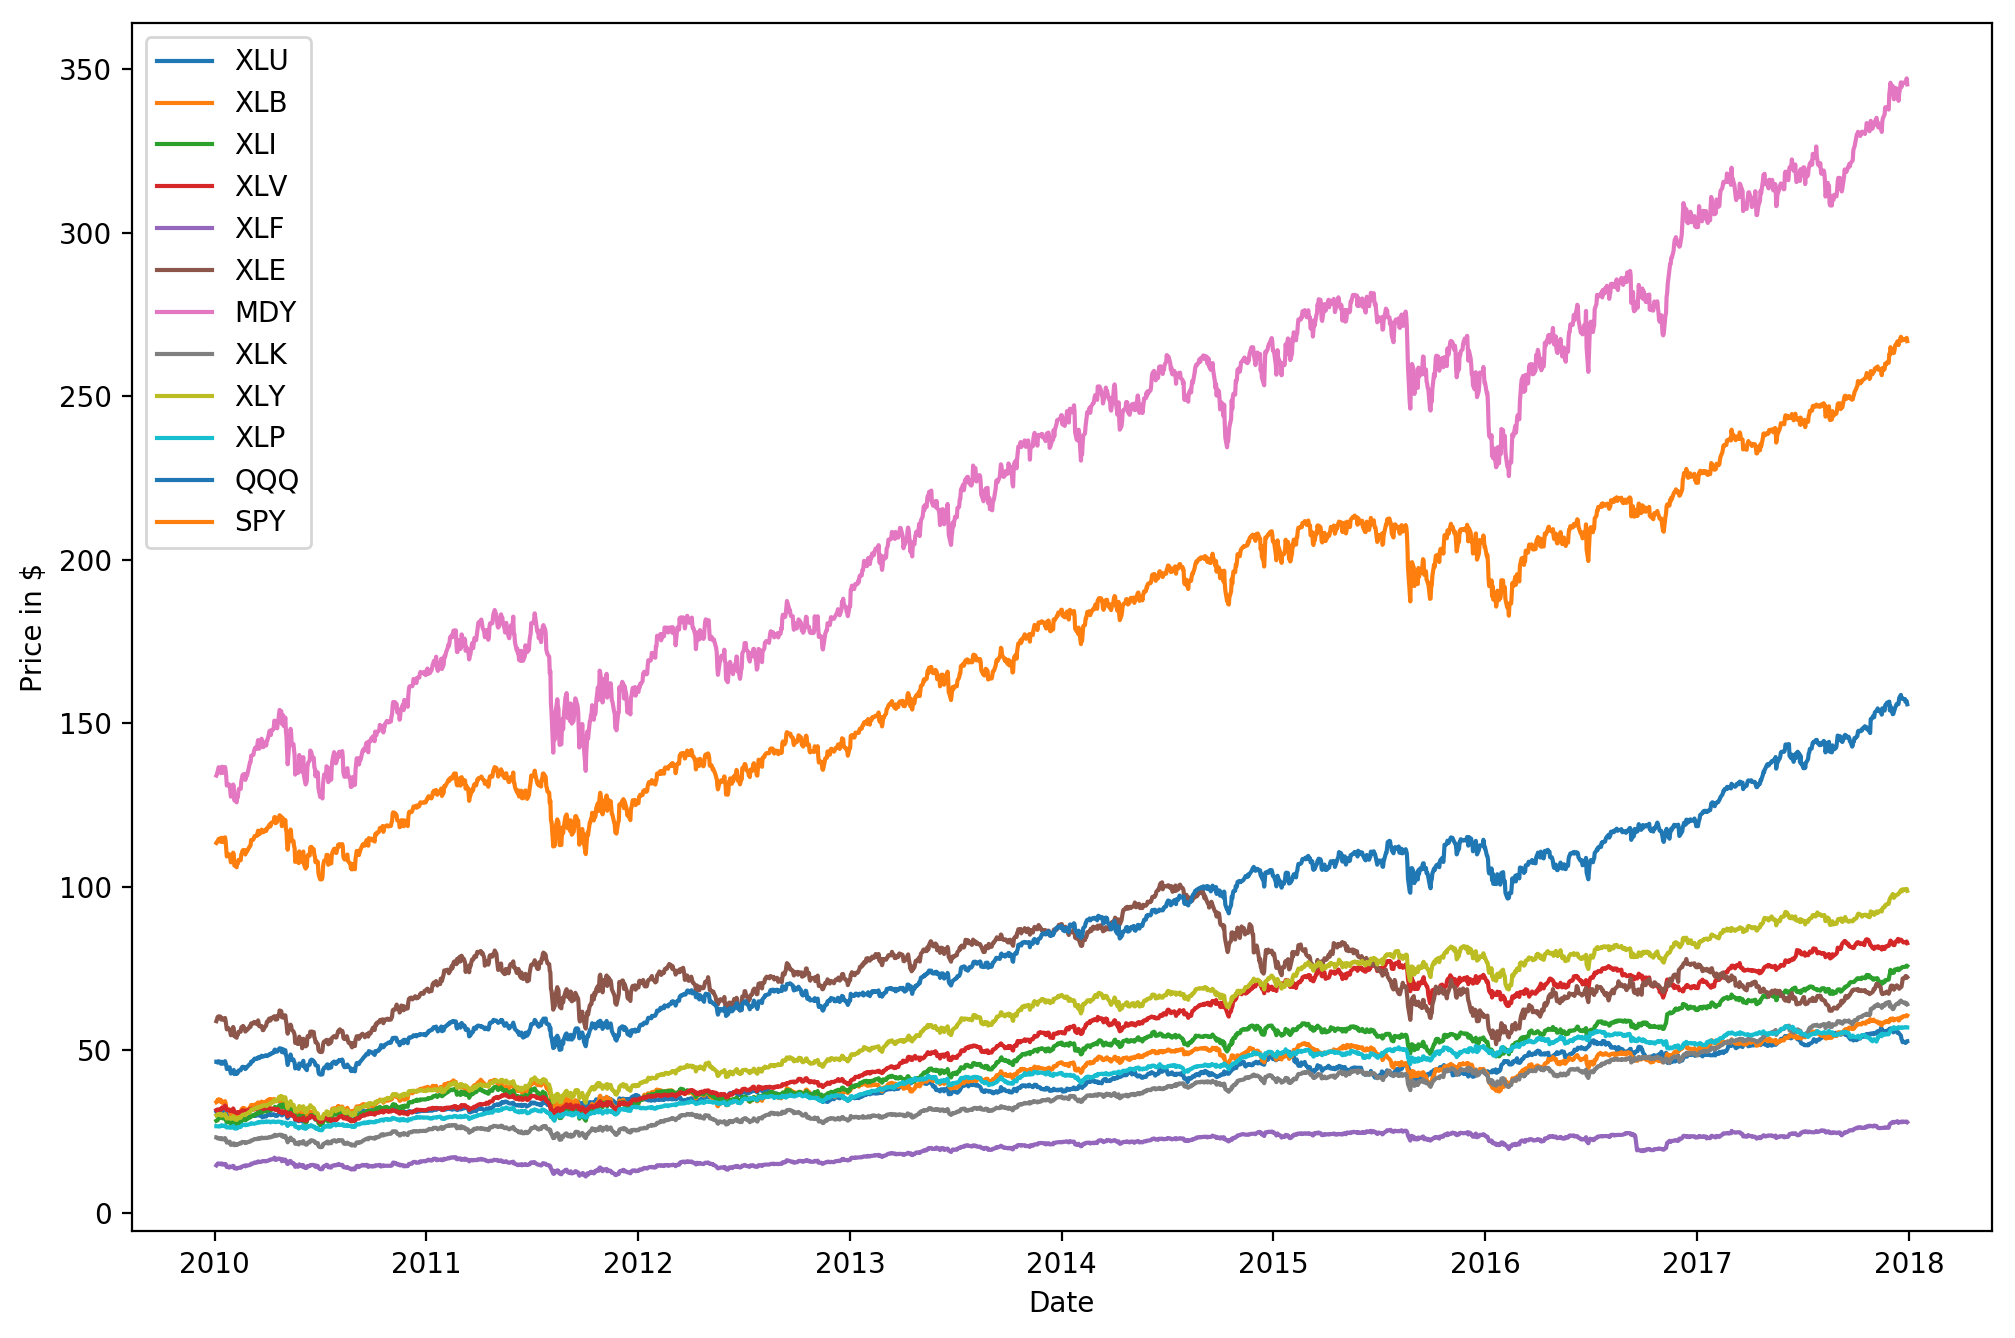

In [258]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(12, 8), dpi= 200)
ax = fig.add_subplot(1,1,1)

for ticker in ticker_symbs:
    #Pandas Series object indexed by date; time series for ticker
    tmp = price.loc[:,ticker]
    ax.plot(tmp.index,tmp,label=ticker)

#make plot pretty
ax.set_xlabel('Date')
ax.set_ylabel('Price in $')
ax.legend()
plt.show()

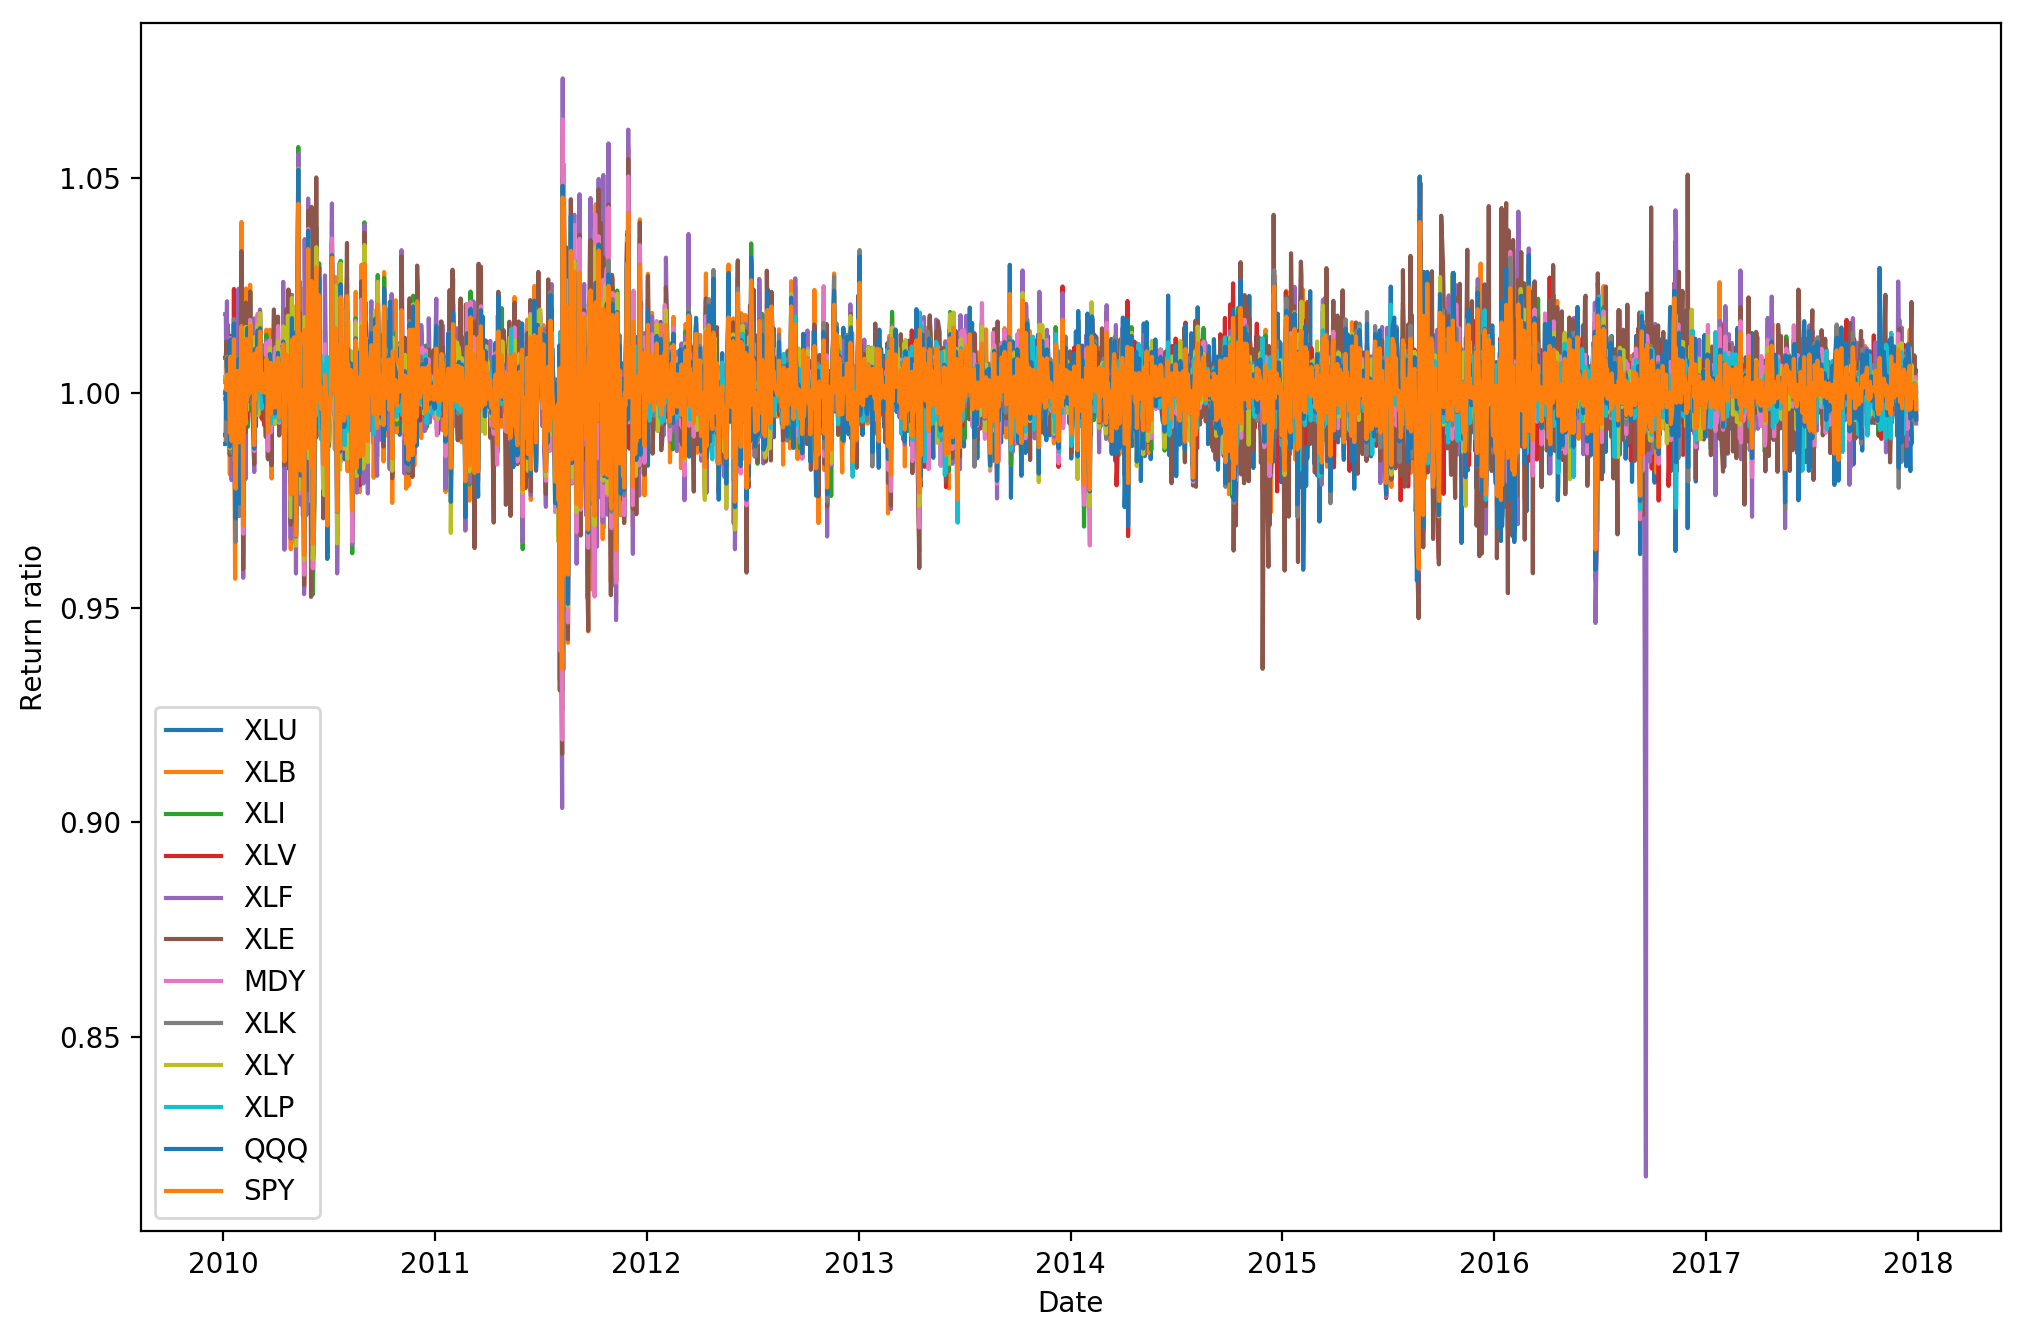

In [260]:
#create Pandas DataFrame of returns
returns = (price/price.shift(1))
returns = returns.fillna(method='bfill') #back-fill to eliminate NaNs

fig=plt.figure(figsize=(12, 8), dpi= 200)
ax = fig.add_subplot(1,1,1)

for ticker in ticker_symbs:
    #Pandas Series object indexed by date; time series for ticker
    tmp = returns.loc[:,ticker]
    ax.plot(tmp.index,tmp,label=ticker)

#make plot pretty
ax.set_xlabel('Date')
ax.set_ylabel('Return ratio')
ax.legend()
plt.show()

# Portfolio Optimization

In [250]:
#from amplpy import AMPL, DataFrame
#ampl = AMPL() #this creates an ampl object using your ampl installation
#ampl.setOption('solver', 'loqo') #this selects solver used for problem

from amplpy import AMPL, DataFrame, ErrorHandler
ampl = AMPL()
ampl.setOption('solver','loqo')
ampl.eval('''option loqo_options "verbose=0 sigfig=12";''')

class MyErrorHandler(ErrorHandler):
    def error(self, exception):
        print('Error:', exception.getMessage())

    def warning(self, exception):
        print('Warning:', exception.getMessage())

errorHandler = MyErrorHandler()
ampl.setErrorHandler(errorHandler)


## Articulate model abstractly:

In [251]:
ampl.eval('''
set Assets;
set Dates;

param T := card(Dates);
param mu;
param returns {Dates,Assets};

param mean {j in Assets} := ( sum{t in Dates} returns[t,j] )/T;
param returns_dev {t in Dates, j in Assets} := returns[t,j] - mean[j];
param meanAbsDev {j in Assets} := sum{t in Dates} abs(returns_dev[t,j]) / T;

var x{Assets} >= 0;
var y{Dates}  >= 0;

maximize reward: sum{j in Assets} mean[j]*x[j] ;

s.t. risk_bound: sum{t in Dates} y[t] / T <= mu;
s.t. tot_mass: sum{j in Assets} x[j] = 1;
s.t. y_lo_bnd {t in Dates}: -y[t] <= sum{j in Assets} returns_dev[t,j]*x[j];
s.t. y_up_bnd {t in Dates}: sum{j in Assets} returns_dev[t,j]*x[j] <= y[t];

''')

## Enter Data:

In [252]:
####set data using python lists####
#use list "ticker_symbs" to set data
ampl.getSet('Assets').setValues(ticker_symbs)

#return business_days as an ndarray of desired dates 
business_days = pd.date_range(start=start_date, 
                                  end=end_date, freq='B').strftime("%Y-%m-%d")
#convert ndarray business_days to list of strings
dates=[] #python list to hold dates
length = len(business_days)
for i in range(length): 
    dates.append(business_days[i])
#use new list of strings "dates" to set data
ampl.getSet('Dates').setValues(dates)

In [253]:
###set returns using python dictionary###
return_dictionary = []
for date in business_days:
    return_dictionary.append(returns.loc[date,:])
#create empty amplpy dataframe for parameter 'returns', indexed by {Dates,Assets}
returns_df = DataFrame(('Dates','Assets'),'returns')
#use dictionary to set this dataframe
returns_df.setValues({
    (date,asset): return_dictionary[d][a]
    for d, date in enumerate(dates)
    for a, asset in enumerate(ticker_symbs)
})
ampl.setData(returns_df) #this includes the data

## Solve model:

In [254]:
ampl.eval('''
set RiskReward := {'risk', 'reward'};
param numiters := 20;
param portfolio {0..numiters, Assets union RiskReward};
set assets_max_mean ordered := {j in Assets: mean[j] == max {jj in Assets} mean[jj]};
param maxrisk := meanAbsDev[first(assets_max_mean)];
param minrisk := min {j in Assets} meanAbsDev[j];

for {k in 0..numiters} {
  display k;  
  let mu := (k/20)*minrisk + (1-k/20)*maxrisk;
  
  solve;
  
  let {j in Assets} portfolio[k,j] := x[j];
  let portfolio[k,'reward'] := reward;
  let portfolio[k,'risk'] := sum{t in Dates} abs(sum{j in Assets} returns_dev[t,j]*x[j]) / T;
}
''')

k = 0

LOQO 7.03: verbose=0
sigfig=12
LOQO 7.03: optimal solution (48 iterations, 48 evaluations)
primal objective 1.000633484
  dual objective 1.000633484
k = 1

LOQO 7.03: verbose=0
sigfig=12
LOQO 7.03: optimal solution (53 iterations, 53 evaluations)
primal objective 1.000632544
  dual objective 1.000632544
k = 2

LOQO 7.03: verbose=0
sigfig=12
LOQO 7.03: optimal solution (57 iterations, 57 evaluations)
primal objective 1.000631414
  dual objective 1.000631414
k = 3

LOQO 7.03: verbose=0
sigfig=12
LOQO 7.03: optimal solution (62 iterations, 62 evaluations)
primal objective 1.000629697
  dual objective 1.000629697
k = 4

LOQO 7.03: verbose=0
sigfig=12
LOQO 7.03: optimal solution (39 iterations, 39 evaluations)
primal objective 1.000623609
  dual objective 1.000623609
k = 5

LOQO 7.03: verbose=0
sigfig=12
LOQO 7.03: optimal solution (41 iterations, 41 evaluations)
primal objective 1.000616595
  dual objective 1.000616595
k = 6

LOQO 7.03: verbose=0
sigfig=12
LOQO 7.03: optimal solutio

## Display output (Efficient Frontier):

In [255]:
ASSETS = ampl.getSet('Assets').getValues() 
portfolio = ampl.getParameter('portfolio')

In [256]:
# Create a python dictionary that will associate (row, column) pairs to the corresponding value 
# Note: portfolio.getValues().toDict() could have been used as well
table = {(int(row), col): value for (row, col, value) in portfolio.getValues()}

# List of row names
rownames = list(range(int(ampl.param["numiters"].value())+1))

# List of column names
colnames = [t[0] for t in ASSETS] + ['risk', 'reward']

# Print the column names
print("\t".join(colnames))    

# Print the rows
for row in rownames: 
    print("\t".join("{:.5f}".format(table[row, col]) if abs(table.get((row, col),0)) > 1e-4 else "" for col in colnames)) 

XLU	XLB	XLI	XLV	XLF	XLE	MDY	XLK	XLY	XLP	QQQ	SPY	risk	reward
	1.00000											0.00715	1.00063
	0.91073										0.08927	0.00705	1.00063
	0.80327										0.19673	0.00696	1.00063
	0.64003										0.35997	0.00686	1.00063
	0.52089									0.03862	0.44049	0.00676	1.00062
	0.50041							0.01272		0.06919	0.41768	0.00667	1.00062
	0.48484							0.04132		0.07129	0.40254	0.00657	1.00061
	0.46483							0.06857		0.07658	0.39002	0.00647	1.00060
	0.44030							0.09633		0.08232	0.38105	0.00638	1.00059
	0.42825							0.12917		0.08171	0.36086	0.00628	1.00059
	0.39737							0.16114		0.08506	0.35643	0.00619	1.00058
	0.36890							0.19318		0.09133	0.34659	0.00609	1.00057
	0.33802							0.22223	0.00451	0.09494	0.34030	0.00599	1.00056
	0.29959							0.23687	0.01707	0.10664	0.33984	0.00590	1.00055
	0.27975							0.26587	0.02543	0.10951	0.31943	0.00580	1.00054
	0.25688							0.28212	0.03974	0.12461	0.29666	0.00570	1.00053
	0.24677							0.30348	0.05438	0.13634	0.25903	0.00561	1.00052
	0.23570							0.32960	

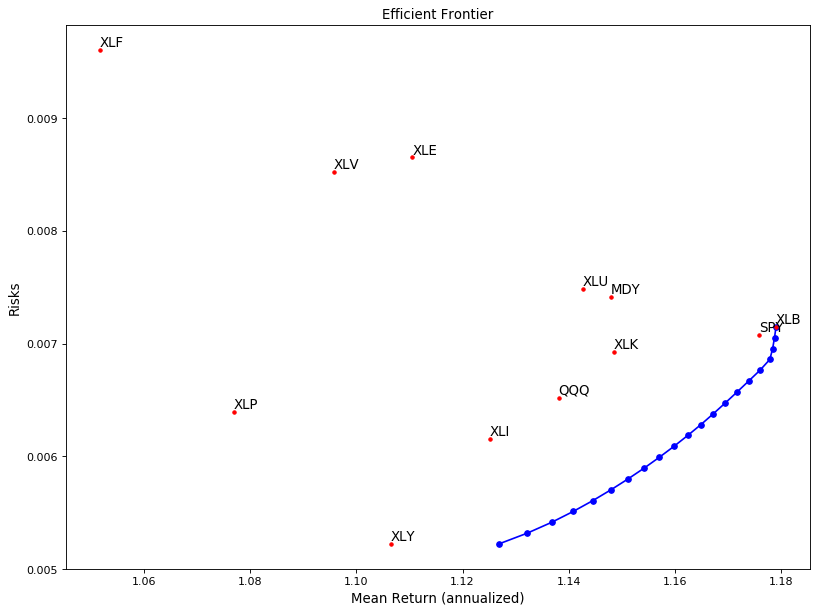

In [257]:
import matplotlib.pyplot as plt
risks = [table[row, 'risk'] for row in rownames]
reward = [table[row, 'reward']**260 for row in rownames]
fig=plt.figure(figsize=(12, 9), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(reward, risks, 'b-o', markersize=5)
font = {'size': 12}; eps = 0.00003
plt.xlabel('Mean Return (annualized)',font)
plt.ylabel('Risks',font)
plt.title('Efficient Frontier',font)

mean = ampl.getParameter('mean')
meanTable = {(j): value for (j, value) in mean.getValues()}

meanAbsDev = ampl.getParameter('meanAbsDev')
meanAbsDevTable = {(j): value for (j, value) in meanAbsDev.getValues()}


for j in ASSETS:
    plt.plot(meanTable[j[0]]**260,meanAbsDevTable[j[0]],'r.')
    plt.text(meanTable[j[0]]**260-eps,meanAbsDevTable[j[0]]+eps,j[0],font)
plt.show()